In [3]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

In [ ]:
# Ganti dengan path foto kamu
result = DeepFace.analyze("images/img1.jpg", actions=['age', 'gender', 'emotion'])

print(f"Umur: {result[0]['age']}")
print(f"Gender: {result[0]['dominant_gender']}")
print(f"Emosi: {result[0]['dominant_emotion']}")

In [ ]:
# Cek apakah 2 foto orang yang sama
result = DeepFace.verify("images/img1.jpg", "images/img2.jpg")

print("Orang yang sama?", result["verified"])
print("Jarak:", result["distance"])

In [ ]:
img = cv2.imread("images/img1.jpg")
img2 = cv2.imread("images/img2.jpg")
img = cv2.hconcat([img, img2])
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [ ]:
# Deteksi wajah pakai webcam
DeepFace.stream(db_path="images")

In [4]:
# Buat folder database dengan banyak foto
# Struktur: images/database/nama_orang/foto.jpg

results = DeepFace.find(
    img_path="images/img1.jpg",
    db_path="images/database"
)
print(results)

25-12-08 20:14:06 - Searching images/img1.jpg in 3 length datastore
25-12-08 20:14:09 - find function duration 4.8877177238464355 seconds
[                                            identity  \
0  images/database\WhatsApp Image 2024-10-14 at 2...   

                                       hash  target_x  target_y  target_w  \
0  f791a28ad57804a010d22abf87bbf0cee3de8f0b       474       499       248   

   target_h  threshold  source_x  source_y  source_w  source_h  distance  \
0       248       0.68       227       941      1131      1131  0.596239   

   confidence  
0       58.46  ,                                             identity  \
0  images/database\WhatsApp Image 2024-10-14 at 2...   
1  images/database\WhatsApp Image 2024-10-14 at 2...   

                                       hash  target_x  target_y  target_w  \
0  d6c551c1d7b7f090ef531b38664c600fb85a4b0a      1907      1260        57   
1  d6c551c1d7b7f090ef531b38664c600fb85a4b0a       662      2487       117   

   tar

In [ ]:
# Coba model berbeda
models = ["VGG-Face", "Facenet", "Facenet512", "ArcFace", "Dlib", "SFace"]

result = DeepFace.verify(
    "images/img1.jpg", 
    "images/img2.jpg",
    model_name="Facenet512"  # Lebih akurat
)
print(result["verified"])

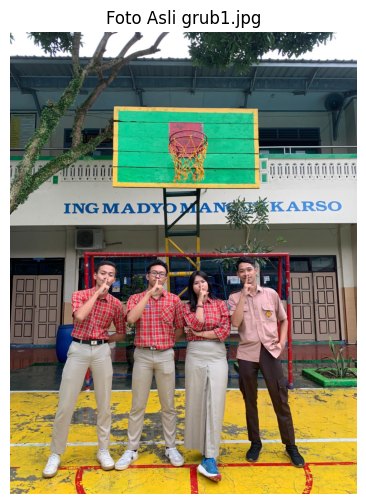

Jumlah wajah: 4


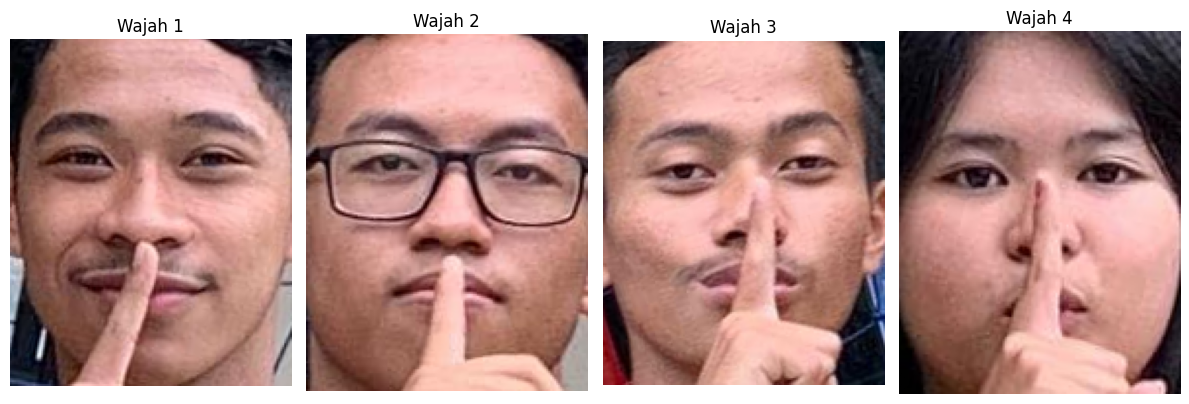

In [7]:
# Tampilkan foto asli grub1.jpg terlebih dahulu
img_path = "images/grub1.jpg"  # Define the image path
img_original = cv2.imread(img_path)
img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 6))
plt.imshow(img_original_rgb)
plt.title("Foto Asli grub1.jpg")
plt.axis('off')
plt.show()

# Kemudian tampilkan wajah yang ter-extract
faces = DeepFace.extract_faces(
    img_path=img_path,
    detector_backend="retinaface"
)
print(f"Jumlah wajah: {len(faces)}")

plt.figure(figsize=(12, 4))
for i, face in enumerate(faces):
    plt.subplot(1, len(faces), i+1)
    plt.imshow(face["face"])
    plt.title(f"Wajah {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import json
import numpy as np

result = DeepFace.analyze("images/img1.jpg", actions=['age', 'gender', 'emotion', 'race'])

# Fungsi untuk convert numpy types ke Python types
def convert_to_serializable(obj):
    if isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, dict):
        return {k: convert_to_serializable(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [convert_to_serializable(i) for i in obj]
    return obj

# Convert result
result_clean = convert_to_serializable(result)

# Simpan ke JSON
with open("hasil_analisis.json", "w") as f:
    json.dump(result_clean, f, indent=2)

print("Hasil disimpan ke hasil_analisis.json")

In [ ]:
import os

folder = "images"
photos = [f for f in os.listdir(folder) if f.endswith(('.jpg', '.png'))]

for photo in photos:
    path = f"{folder}/{photo}"
    result = DeepFace.analyze(path, actions=['age', 'gender', 'emotion'])
    print(f"{photo}: Umur {result[0]['age']}, {result[0]['dominant_gender']}, {result[0]['dominant_emotion']}")